In [1]:
import pandas as pd # для работы с таблицами
import numpy as np # для работы с работы с математикой

import matplotlib.pyplot as plt
import seaborn as sns # для графиков

import scipy.stats as st # для статистических тестов

In [2]:
%config InlineBackend.figure_format = 'retina'

sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'

In [6]:
df = pd.read_csv('vgsales_w_ratings.csv', sep=',')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [8]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
df['User_Score'] = df['User_Score'].replace('tbd', np.NaN)
df['Year_of_Release'] = df['Year_of_Release'].astype('Int64')
df['User_Count'] = df['User_Count'].astype('Int64')
df['User_Score'] = df['User_Score'].astype('float64')
df['Critic_Count'] = df['Critic_Count'].astype('Int64')

In [11]:
df[['User_Score', 'Critic_Score']]

,User_Score,Critic_Score
0,8.0,76.0
1,NaN,NaN
2,8.3,82.0
3,8.0,80.0
4,NaN,NaN
...,...,...
16714,NaN,NaN
16715,NaN,NaN
16716,NaN,NaN
16717,NaN,NaN


In [12]:
df['User_Score'] = df['User_Score'] * 10

In [14]:
sport_c = df[df['Genre'] == 'Sports']
sport_c = sport_c[['Critic_Score']]
sport_c.head()

,Critic_Score
0,76.0
3,80.0
13,80.0
15,80.0
77,82.0


In [15]:
sport_u = df[df['Genre'] == 'Sports']
sport_u = sport_u[['User_Score']]
sport_u.head()

,User_Score
0,80.0
3,80.0
13,77.0
15,74.0
77,43.0


In [16]:
sport_c.var()

Critic_Score    192.610889
dtype: float64

In [17]:
sport_u.var()

User_Score    259.651472
dtype: float64

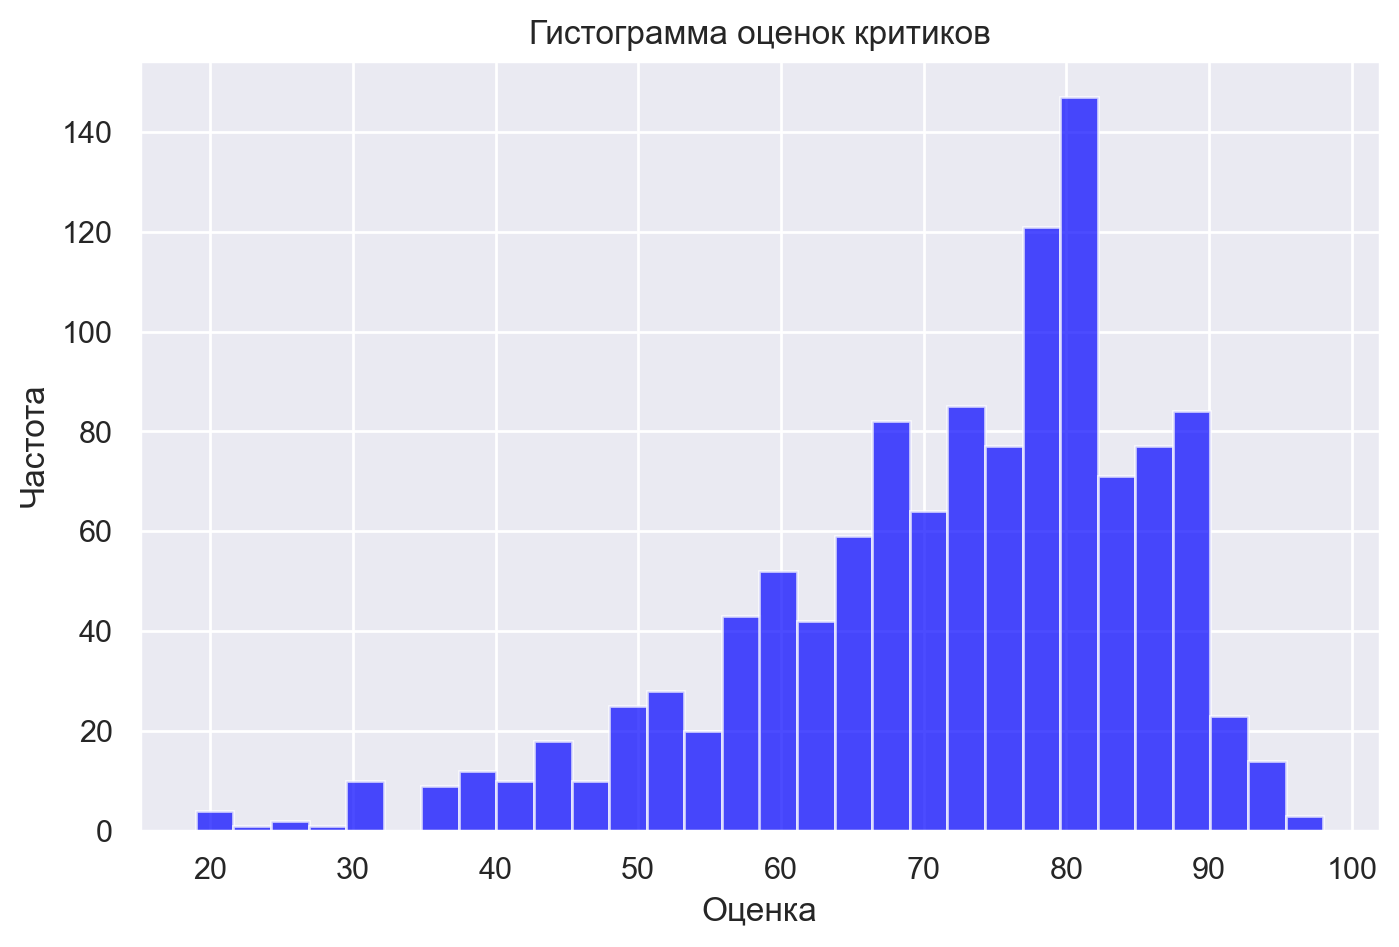

In [18]:
plt.hist(sport_c, bins=30, color='blue', alpha=0.7)
plt.title('Гистограмма оценок критиков')
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

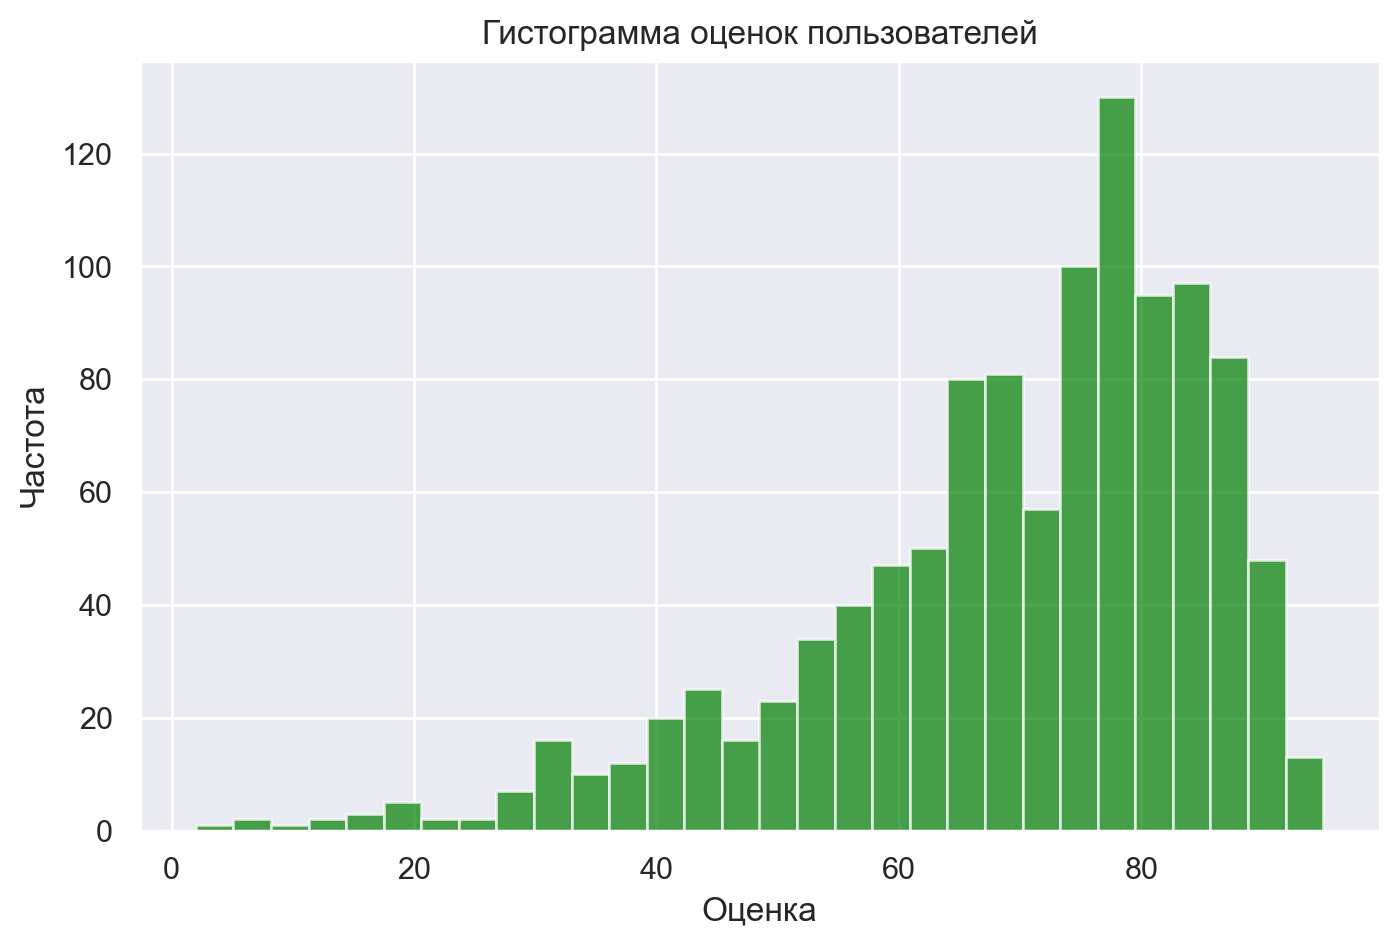

In [19]:
plt.hist(sport_u, bins=30, color='green', alpha=0.7)
plt.title('Гистограмма оценок пользователей')
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Проверим, одинаково ли в среднем оценивают игры критики и пользователи. Дисперсии групп неизвестны и в наших выборках их рассчётные значения не равны, следовательно воспользуемся тестом Уэлча. Сформулируем гипотезы:

- $H_0:$ средние значения оценок критиков и пользователей равны
- $H_1:$ средние значения оценок критиков и пользователей не равны

In [24]:
t, p_value = st.ttest_ind(sport_c, sport_u, nan_policy='omit', equal_var = False) 
t, p_value

print(f'Статистика = {t[0]}, p = {p_value[0]}')

if p_value > 0.05:
    print('Не отклоняем нулевую гипотезу: скорее всего средние оценки равны.')
else:
    print('Отклоняем нулевую гипотезу: скорее всего средние оценки различаются.')

Статистика = 3.740857187853118, p = 0.00018812205580357843
Отклоняем нулевую гипотезу: скорее всего средние оценки различаются.


In [25]:
pc = df[df['Platform'] == 'PC']
pc = pc[['Critic_Score']]
pc.head()

,Critic_Score
85,86.0
138,93.0
192,88.0
195,NaN
218,93.0


In [28]:
ps4 = df[df['Platform'] == 'PS4']
ps4 = ps4[['Critic_Score']]
ps4.head()

,Critic_Score
31,NaN
42,97.0
77,82.0
87,NaN
92,83.0


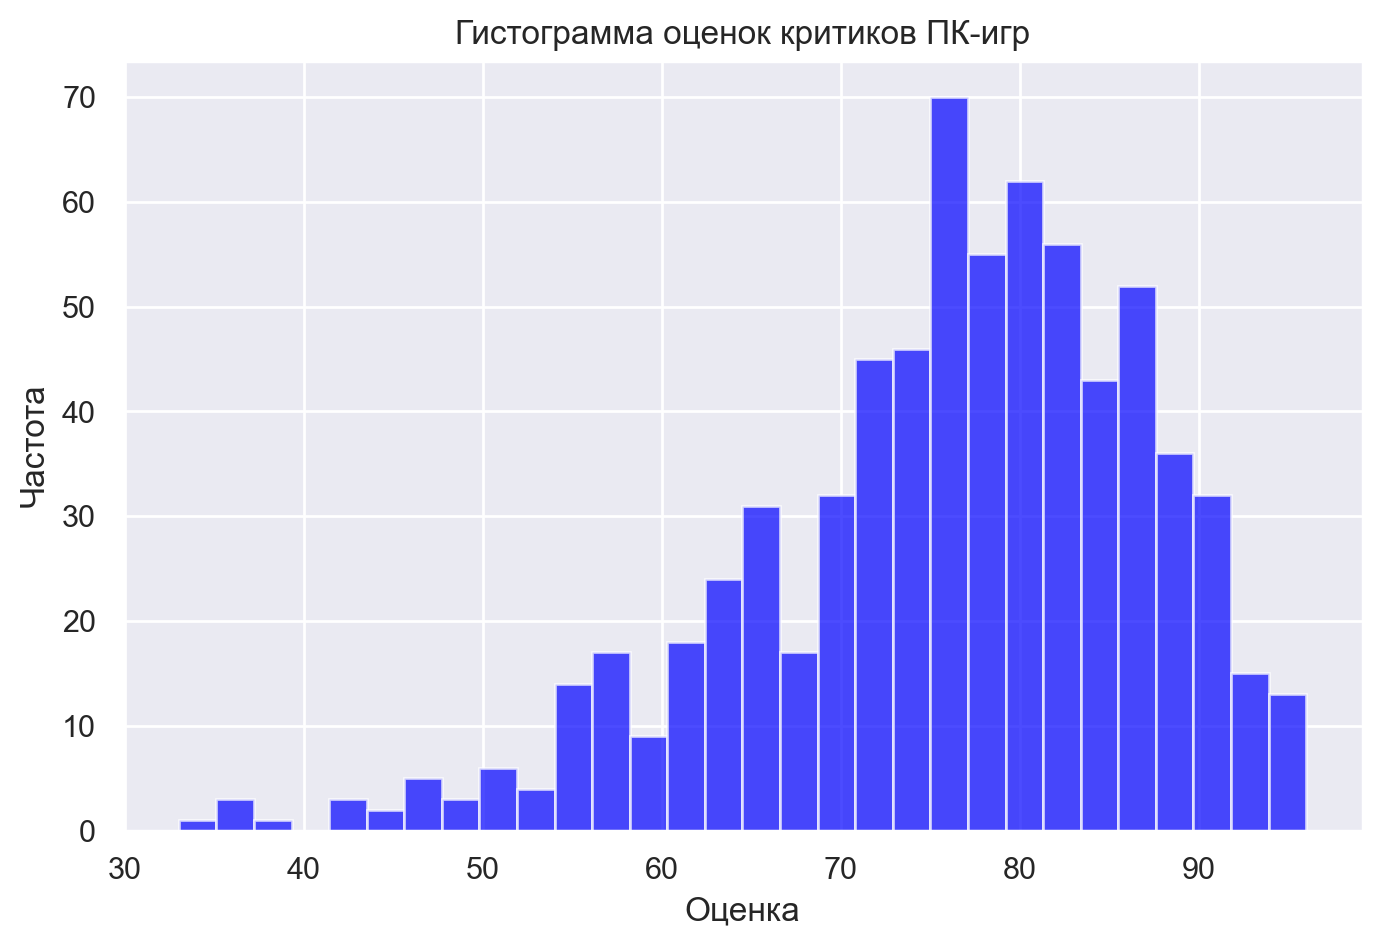

In [30]:
plt.hist(pc, bins=30, color='blue', alpha=0.7)
plt.title('Гистограмма оценок критиков ПК-игр')
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

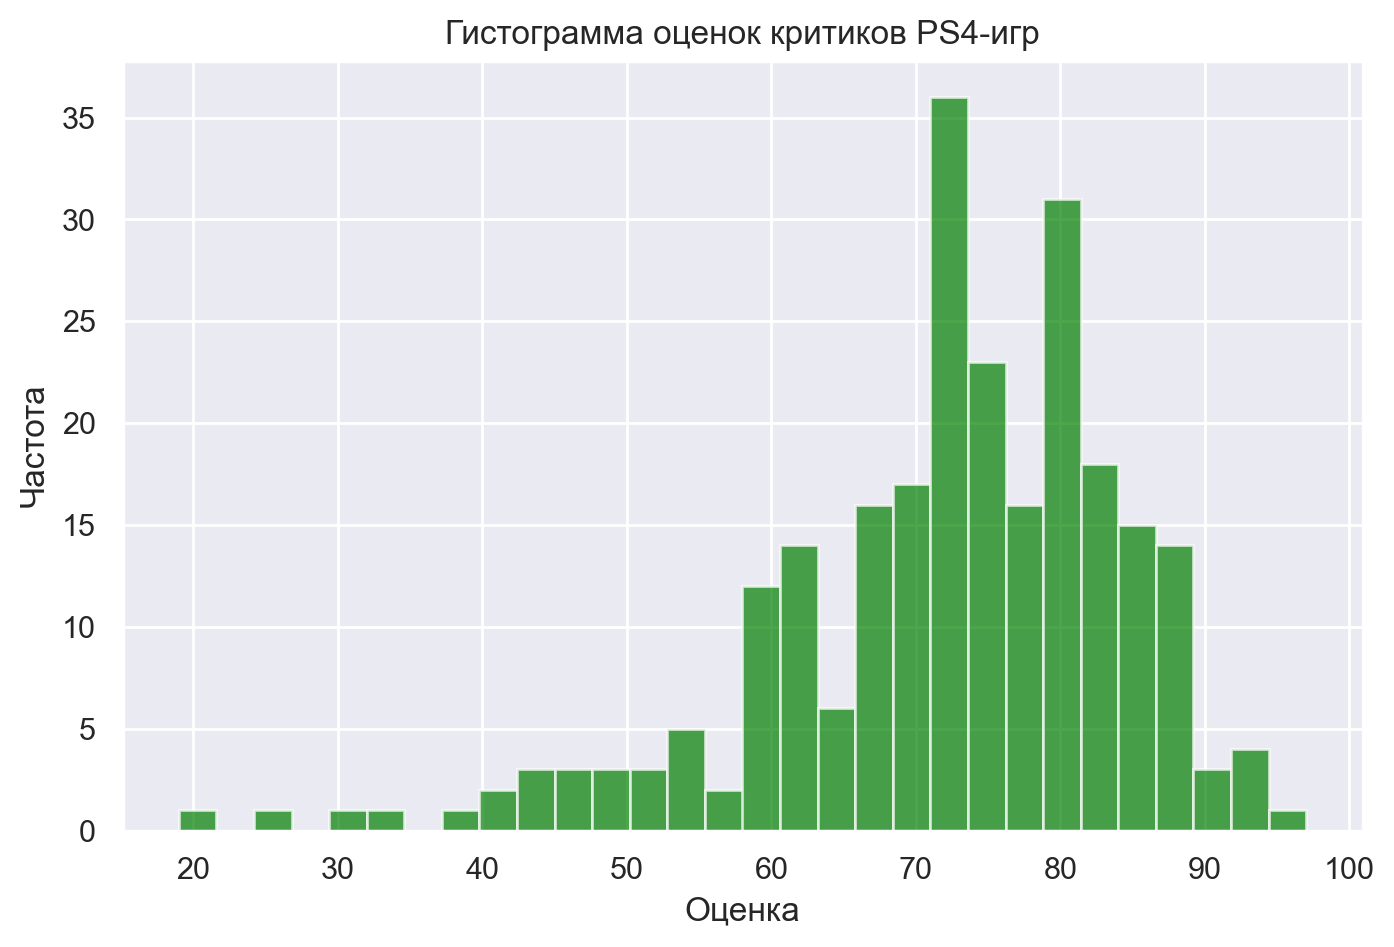

In [31]:
plt.hist(ps4, bins=30, color='green', alpha=0.7)
plt.title('Гистограмма оценок критиков PS4-игр')
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [32]:
pc.var()

Critic_Score    124.786222
dtype: float64

In [33]:
ps4.var()

Critic_Score    155.900003
dtype: float64

Проверим, одинаково ли в среднем оценивают игры критики для платформ ПК и PS4. Дисперсии групп неизвестны и в наших выборках их рассчётные значения не равны, следовательно воспользуемся тестом Уэлча. Сформулируем гипотезы:

- $H_0:$ средние значения оценок критиков для ПК и PS4 равны
- $H_1:$ средние значения оценок критиков для ПК и PS4 не равны

In [34]:
t, p_value = st.ttest_ind(pc, ps4, nan_policy='omit', equal_var = False) 
t, p_value

print(f'Статистика = {t[0]}, p = {p_value[0]}')

if p_value > 0.05:
    print('Не отклоняем нулевую гипотезу: скорее всего средние оценки равны.')
else:
    print('Отклоняем нулевую гипотезу: скорее всего средние оценки различаются.')

Статистика = 4.3087588262138725, p = 2.067249157283479e-05
Отклоняем нулевую гипотезу: скорее всего средние оценки различаются.


In [35]:
pc.mean()

Critic_Score    75.928671
dtype: float64

In [36]:
ps4.mean()

Critic_Score    72.09127
dtype: float64